<a href="https://colab.research.google.com/github/Sen-Ma/PUBG-Kaggle/blob/master/PUBG_EDA_is_Fun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive 
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
train = pd.read_csv("/content/gdrive/My Drive/pubg/train_V2.csv")

In [3]:
train.info()
len(train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(4)
memory usage: 983.9+ MB


4446966

In [4]:
solo = train[train['numGroups']>50]
solo.assists.mean()

0.05778220899125807

여기서 의아한 것은 <br>
assists - Number of enemy players this player damaged that were killed by teammates.<br>
팀원이 죽인 적 플레이어에게 데미지를 입힌 숫자를 말하는데, 혼자 플레이 하게 되는 solo play의 경우에도 평균값이 0이 아니며, 심지어 max값은 5에 이른다는 점이다. 

개인적으로 생각해 보았을떄는, 플레이어가 상대에게 데미지를 입힌 숫자를 뜻하는 것 같다. 

즉, kills + assists = 데미지를 입힌 적의 총 숫자

In [5]:
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


<b>The Killer

In [6]:
print("The average person kills {:.4f} players, 99% of people have {} kills or less, while the most kills ever recorded is {}." .format(train['kills'].mean(), train['kills'].quantile(0.99), train['kills'].max()))

The average person kills 0.9248 players, 99% of people have 7.0 kills or less, while the most kills ever recorded is 72.


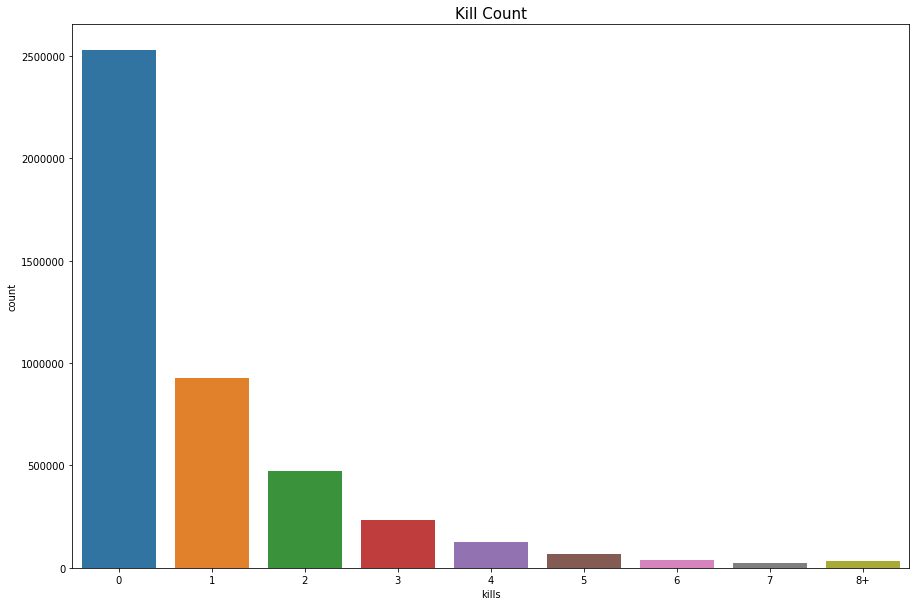

In [7]:
data = train.copy()
data.loc[data['kills'] > data['kills'].quantile(0.99)] = '8+'
plt.figure(figsize = (15,10))
sns.countplot(data['kills'].astype('str').sort_values())
plt.title("Kill Count", fontsize = 15)
plt.show()

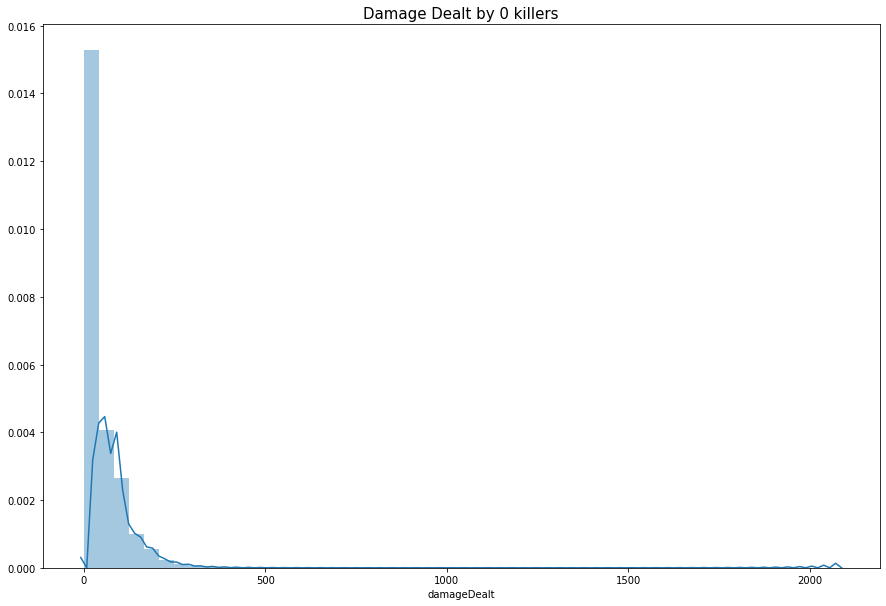

In [8]:
data = train.copy()
data = data[data['kills'] == 0]
plt.figure(figsize=(15,10))
plt.title("Damage Dealt by 0 killers", fontsize =15)
sns.distplot(data['damageDealt'])
plt.show()

In [9]:
print("{} players ({:.4f}%) have won without a single kill!".format(len(data[data['winPlacePerc']==1]), 100*len(data[data['winPlacePerc']==1])/len(train)))
data1 = train[train['damageDealt']==0].copy()
print("{} players ({:.4f}%) have won without dealing damage!". format(len(data1[data1['winPlacePerc']==1]), 100*len(data1[data1['winPlacePerc']==1])/len(train)))

16666 players (0.3748%) have won without a single kill!
4770 players (0.1073%) have won without dealing damage!


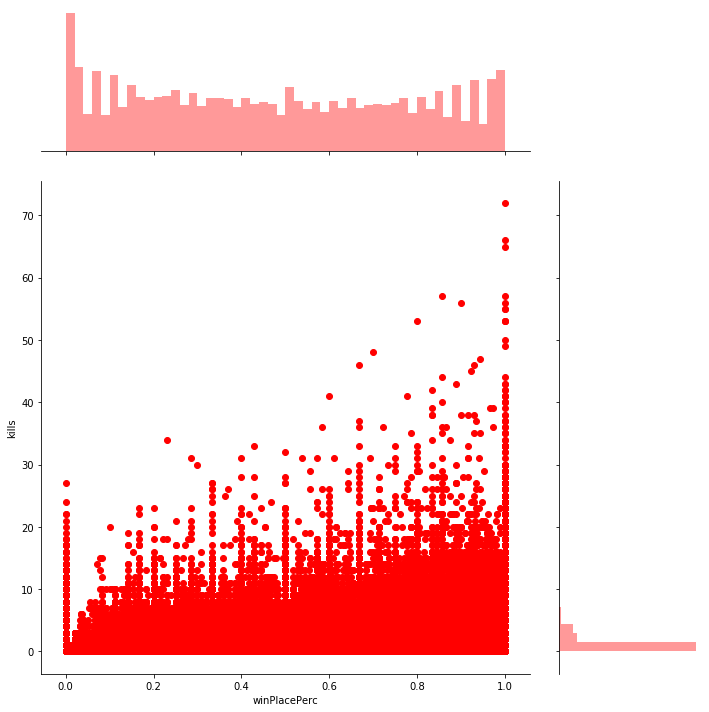

In [10]:
sns.jointplot(x = "winPlacePerc", y = "kills", data = train, height =10, ratio = 3, color = 'r')
plt.show()

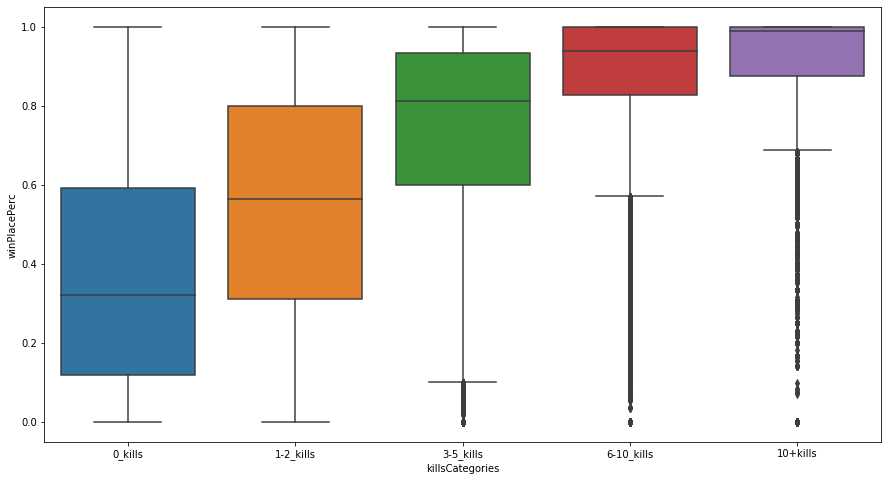

In [11]:
kills = train.copy()

kills['killsCategories'] = pd.cut(kills['kills'], [-1,0,2,5,10,72], labels = ['0_kills', '1-2_kills', '3-5_kills', '6-10_kills', '10+kills'])

plt.figure(figsize=(15,8))
sns.boxplot(x = "killsCategories", y = "winPlacePerc", data = kills)
plt.show()

In [12]:
print("The average person walks for {:.1f}m, 99% of people have walked {}m or less, while the marathoner champion walked for {}m.".format(train['walkDistance'].mean(), train['walkDistance'].quantile(0.99),train['walkDistance'].max()))

The average person walks for 1154.2m, 99% of people have walked 4396.0m or less, while the marathoner champion walked for 25780.0m.


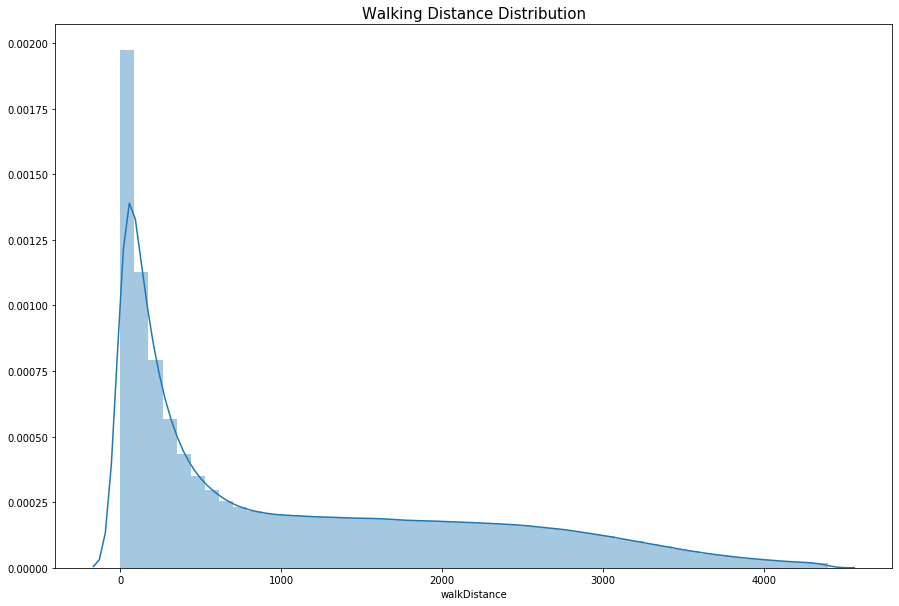

In [13]:
data = train.copy()
data = data[data['walkDistance'] < train['walkDistance'].quantile(0.99)]
plt.figure(figsize = (15,10))
plt.title("Walking Distance Distribution", fontsize = 15)
sns.distplot(data['walkDistance'])
plt.show()

In [14]:
print("{} players ({:.4f}%) walked 0 meters. This means that they die before even taking step or they are afk (more possible).".format(len(data[data['walkDistance'] == 0]), 100*len(data1[data1['walkDistance']==0])/len(train)))

99603 players (2.0329%) walked 0 meters. This means that they die before even taking step or they are afk (more possible).


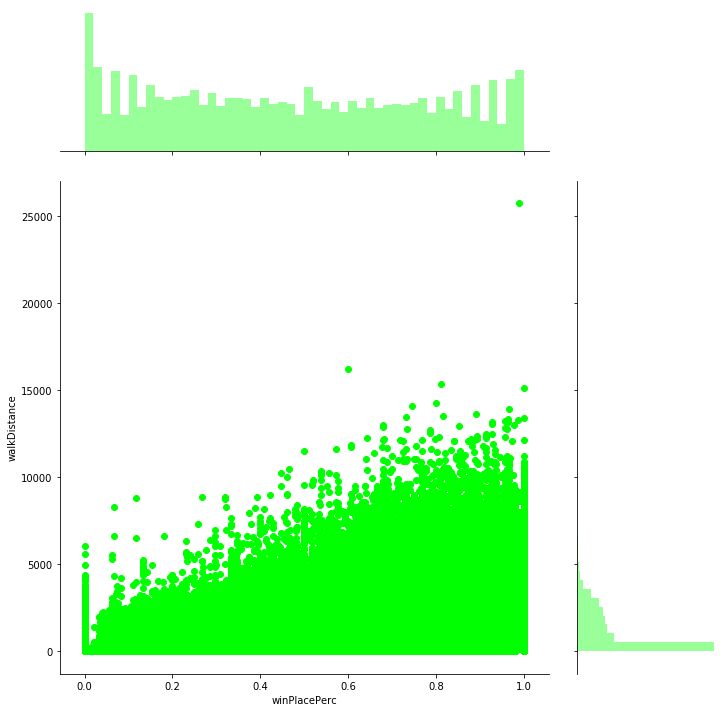

In [15]:
sns.jointplot(x = "winPlacePerc", y= "walkDistance", data = train, height = 10, ratio = 3, color = "lime")
plt.show()

In [16]:
print("The average person drives for {:.1f}m, 99% of people have drived {}m or less, while the formula 1 champion drived for {}m.".format(train['rideDistance'].mean(), train['rideDistance'].quantile(0.99), train['rideDistance'].max()))

The average person drives for 606.1m, 99% of people have drived 6966.0m or less, while the formula 1 champion drived for 40710.0m.


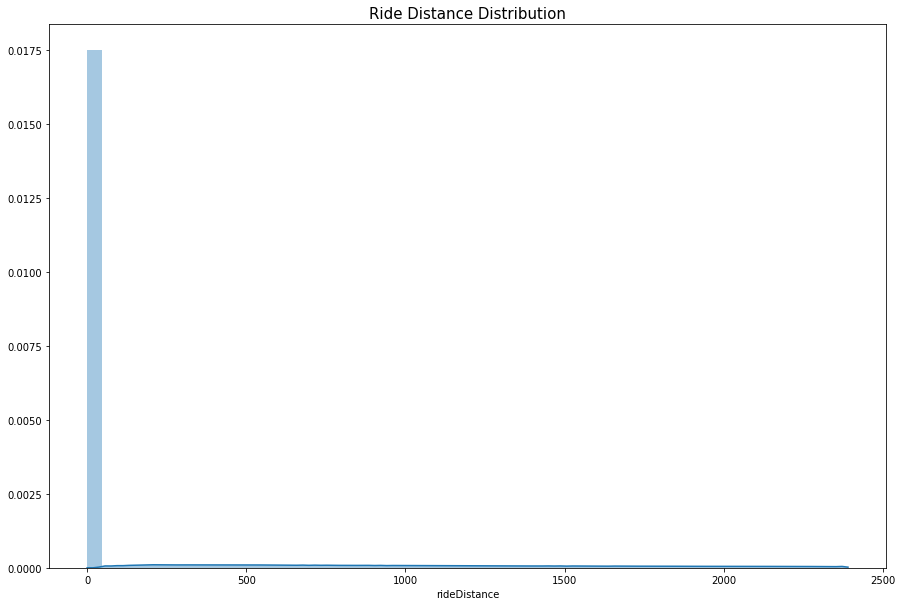

In [17]:
data = train.copy()
data = data[data['rideDistance'] < train['rideDistance'].quantile(0.9)]
plt.figure(figsize=(15,10))
plt.title("Ride Distance Distribution", fontsize = 15)
sns.distplot(data['rideDistance'])
plt.show()

In [18]:
print("{} players ({:.4f}%) drived for 0 meters. This means that they don't have a driving licence yet.".format(len(data[data['rideDistance'] == 0]), 100*len(data1[data1['rideDistance']==0])/len(train)))

3309429 players (23.1022%) drived for 0 meters. This means that they don't have a driving licence yet.


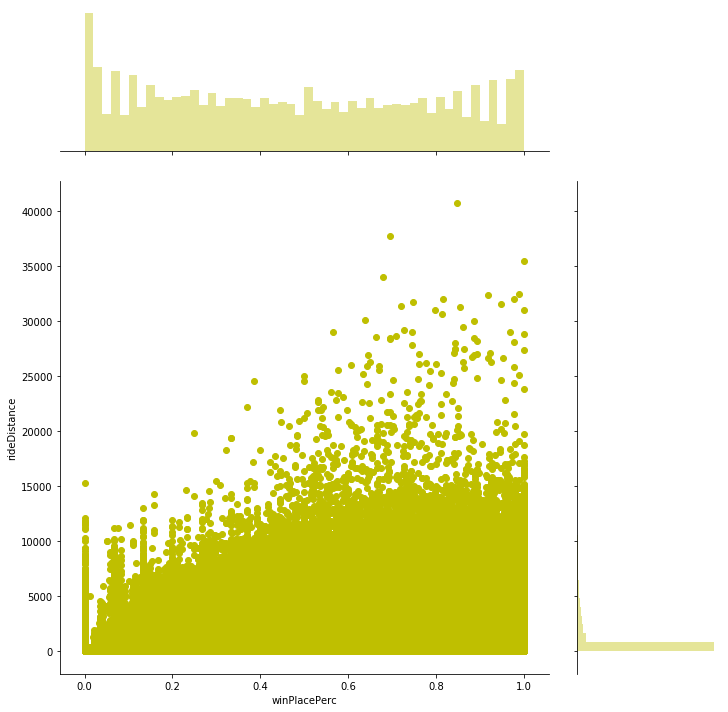

In [19]:
sns.jointplot(x = "winPlacePerc", y = "rideDistance", data= train, height=10, ratio = 3, color = "y")
plt.show()

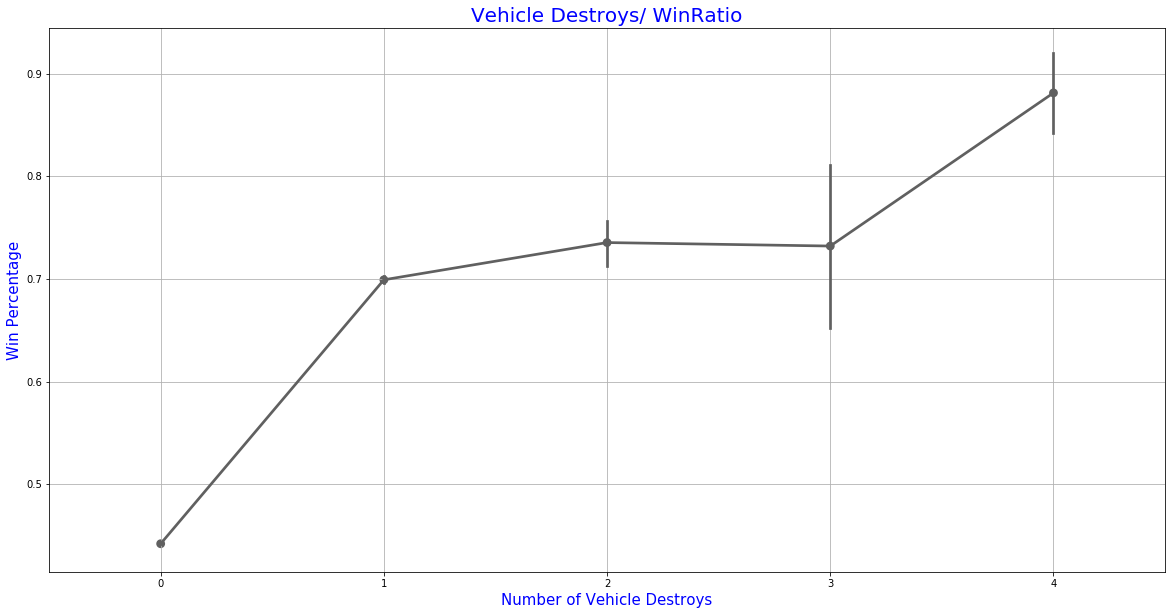

In [21]:
f, ax1 = plt.subplots(figsize = (20, 10))
sns.pointplot(x = 'vehicleDestroys', y='winPlacePerc', data=data, color = '#606060', alpha = 0.8)
plt.xlabel('Number of Vehicle Destroys', fontsize = 15, color = 'blue')
plt.ylabel('Win Percentage', fontsize = 15, color = 'blue')
plt.title('Vehicle Destroys/ WinRatio', fontsize =20, color=  'blue')
plt.grid()
plt.show()

The Swimmers

In [22]:
print("The average person swims for {:.1f}m, 99% of people have swimemd {}m or less, while the olympic champion swimmed for {}m.".format(train['swimDistance'].mean(), train['swimDistance'].quantile(0.99), train['swimDistance'].max()))

The average person swims for 4.5m, 99% of people have swimemd 123.0m or less, while the olympic champion swimmed for 3823.0m.


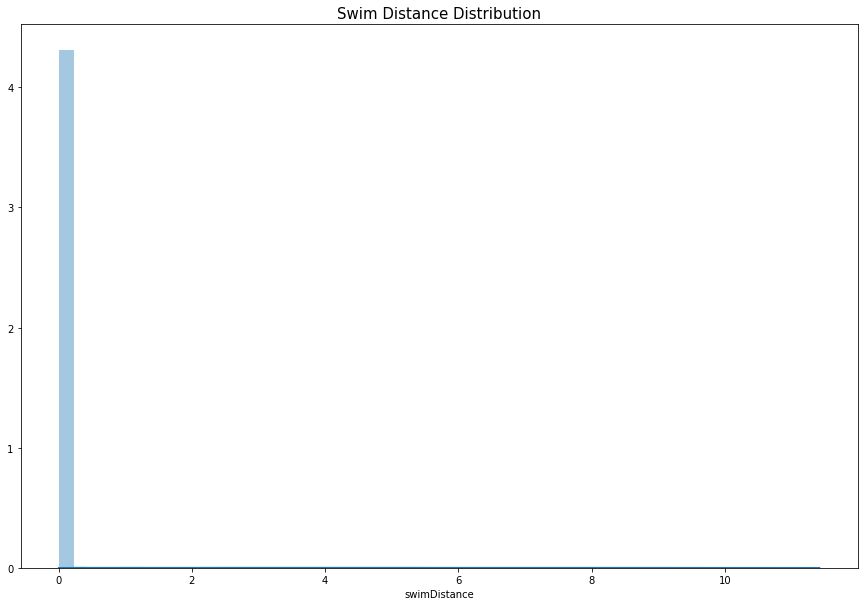

In [24]:
data = train.copy()
data = data[data['swimDistance'] < train['swimDistance'].quantile(0.95)]
plt.figure(figsize = (15,10))
plt.title("Swim Distance Distribution", fontsize = 15)
sns.distplot(data['swimDistance'])
plt.show()

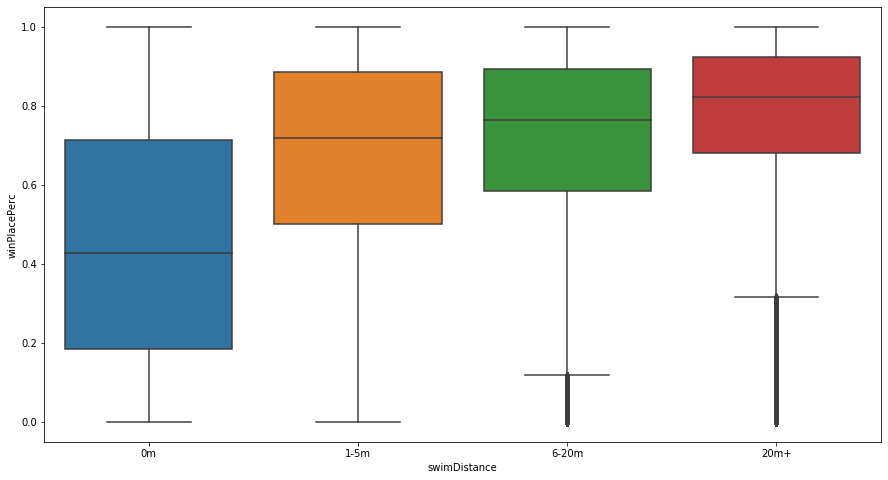

In [26]:
swim = train.copy()
swim['swimDistance'] = pd.cut(swim['swimDistance'], [-1, 0, 5, 20, 3824], labels = ['0m', '1-5m','6-20m','20m+'])
plt.figure(figsize = (15,8))
sns.boxplot(x = "swimDistance", y = "winPlacePerc", data = swim)
plt.show()

The Healers

In [29]:
print("The average person uses {:.1f} heal items, 99% of people use {} or less, while the doctor used {}. ".format(train['heals'].mean(),train['heals'].quantile(0.99), train['heals'].max()))
print("The average person uses {:.1f} boost items, 99% of people use {} or less, while the doctor used {}.".format(train['boosts'].mean(), train['boosts'].quantile(0.99), train['boosts'].max()))

The average person uses 1.4 heal items, 99% of people use 12.0 or less, while the doctor used 80. 
The average person uses 1.1 boost items, 99% of people use 7.0 or less, while the doctor used 33.


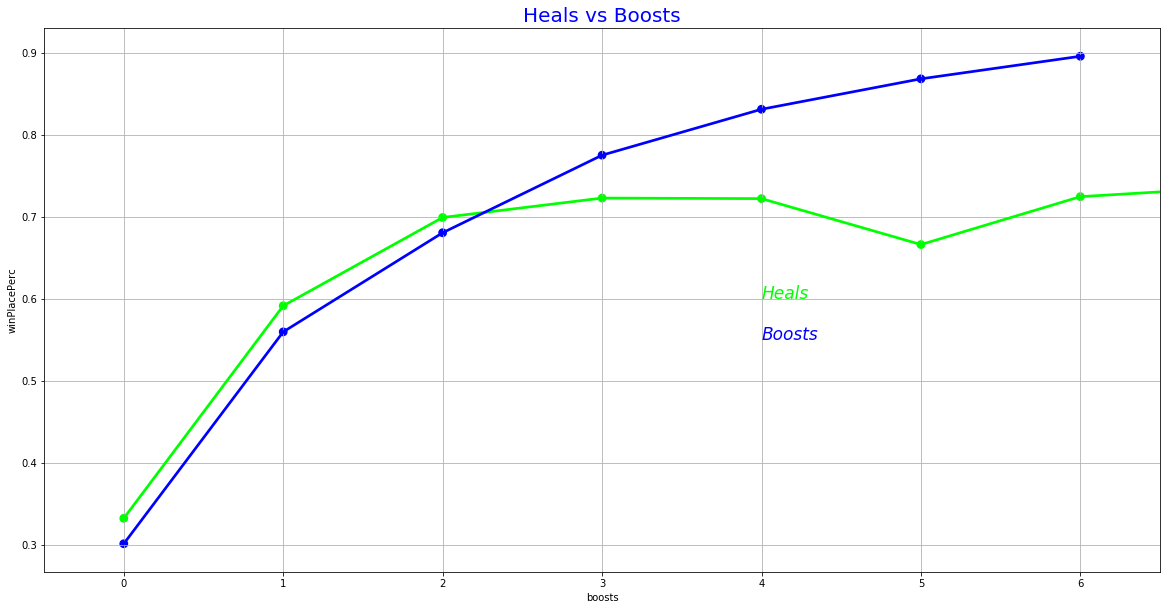

In [30]:
data = train.copy()
data = data[data['heals'] < data['heals'].quantile(0.99)]
data = data[data['boosts'] < data['boosts'].quantile(0.99)]

f, ax = plt.subplots(figsize = (20,10))
sns.pointplot(x = 'heals', y= 'winPlacePerc', data = data, color = 'lime', alpha = 0.8)
sns.pointplot(x = 'boosts', y = 'winPlacePerc', data = data, color = 'blue', alpha = 0.8)
plt.text(4,0.6, 'Heals', color = 'lime', fontsize = 17, style = 'italic')
plt.text(4,0.55, 'Boosts', color = 'blue', fontsize = 17, style = 'italic')
plt.title('Heals vs Boosts', fontsize = 20, color = 'blue')
plt.grid()
plt.show()

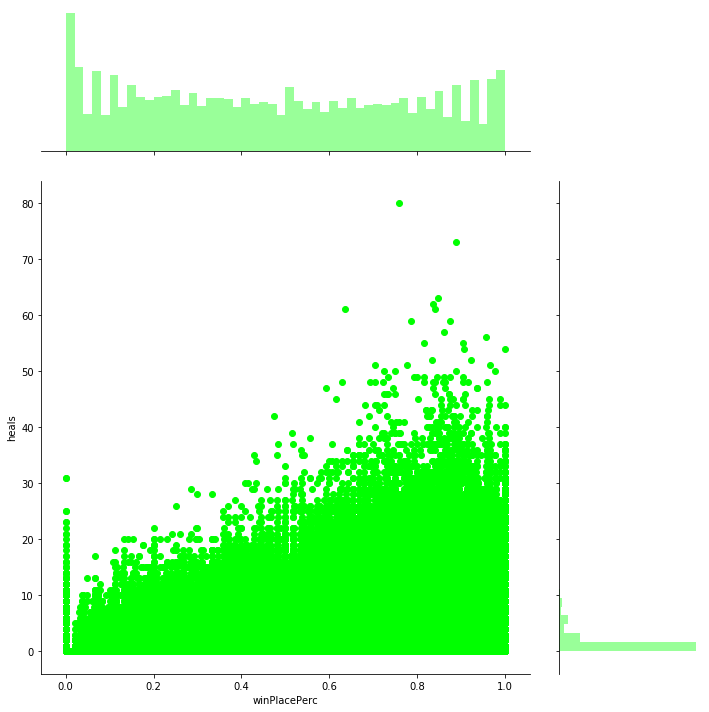

In [31]:
sns.jointplot(x = "winPlacePerc", y = "heals", data = train, height = 10, ratio = 3, color = "lime")
plt.show()

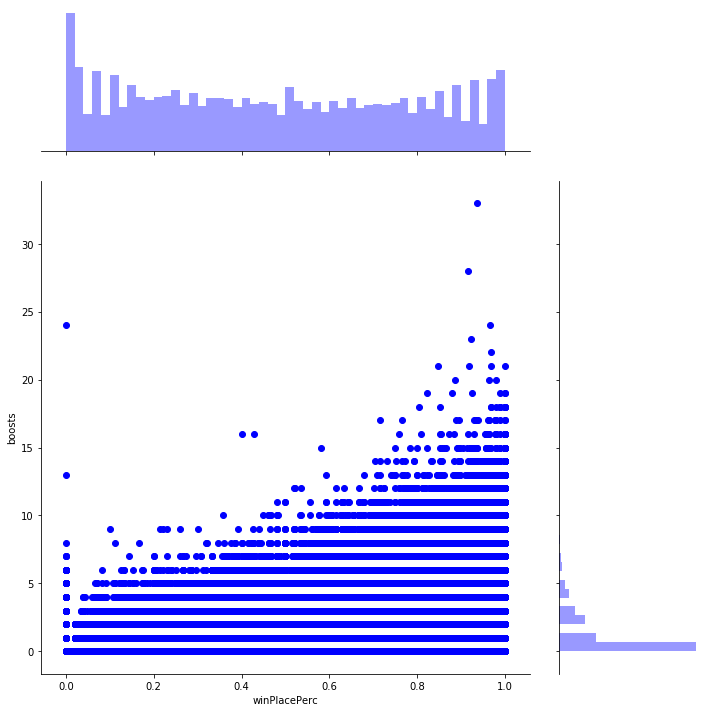

In [32]:
sns.jointplot(x = "winPlacePerc", y = "boosts", data = train, height = 10, ratio = 3, color = "blue")
plt.show()

In [33]:
solos = train[train['numGroups']>50]
duos = train[(train['numGroups']>25) & (train['numGroups']<=50)]
squads = train[train['numGroups']<=25]

print("There are {} ({:.2f}%) solo games, {} ({:.2f}%) duo games and {} ({:.2f}%) squad games.".format(len(solos), 100*len(solos)/ len(train), len(duos), 100*len(duos)/len(train), len(squads), 100*len(squads)/len(train),))

There are 709111 (15.95%) solo games, 3295326 (74.10%) duo games and 442529 (9.95%) squad games.


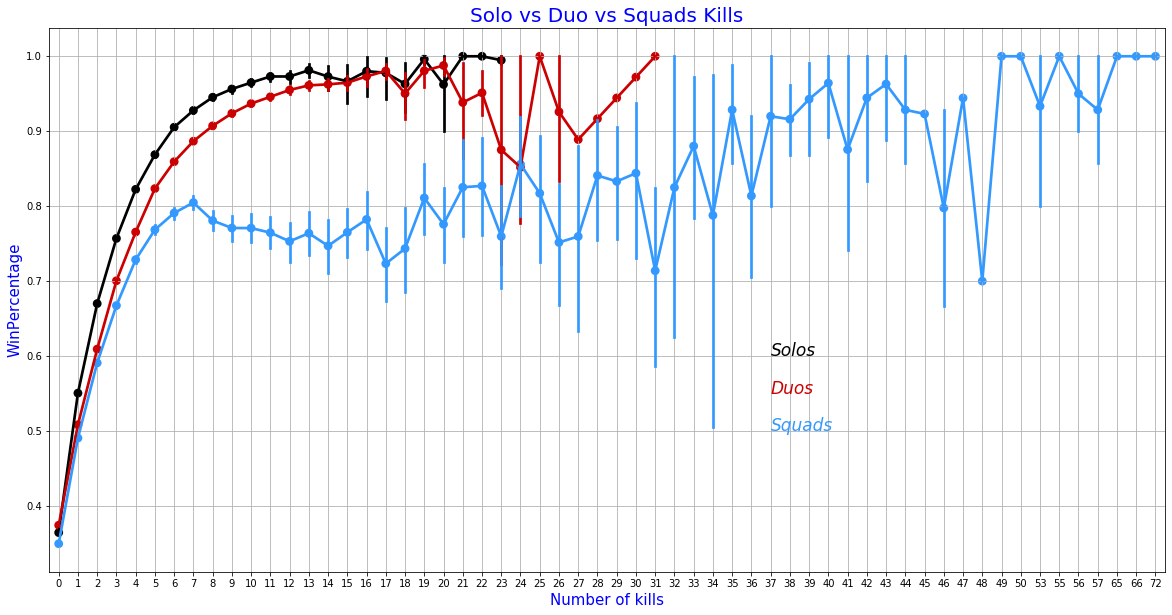

In [38]:
f, ax1 = plt.subplots(figsize = (20,10))
sns.pointplot(x = 'kills', y = 'winPlacePerc', data = solos, color = 'black', alpha = 0.8)
sns.pointplot(x = 'kills', y = 'winPlacePerc', data = duos, color = '#CC0000', alpha = 0.8)
sns.pointplot(x = 'kills', y = 'winPlacePerc', data = squads, color = '#3399FF', alpha = 0.8)

plt.text(37,0.6, 'Solos',color = 'black', fontsize = 17, style = 'italic')
plt.text(37,0.55, 'Duos', color = '#CC0000', fontsize = 17, style = 'italic')
plt.text(37,0.5, 'Squads', color = '#3399FF', fontsize = 17, style = 'italic')
plt.xlabel('Number of kills', fontsize = 15, color = 'blue')
plt.ylabel('WinPercentage', fontsize = 15, color = 'blue')
plt.title('Solo vs Duo vs Squads Kills', fontsize = 20, color = 'blue')
plt.grid()
plt.show()